----
----
# visualizations and evaluation

1. distribution(data, transformed=False): 
This function is used to visualize the distribution of skewed features in a dataset. It takes the dataset (data) as input and optionally a parameter transformed (defaulted to False) to indicate whether the data has been transformed. It uses matplotlib to create histograms for the 'capital-gain' and 'capital-loss' features.
----
 2. evaluate(results, accuracy, f1): 
 This function is used to visualize the results of various machine learning models. It takes three inputs:
​
*  results: A dictionary containing the results of different learners. Each learner's results should be a dictionary of metrics (e.g., train_time, acc_train, f_train, pred_time, acc_test, f_test) for different training set sizes (1%, 10%, 100%).
​
*  accuracy: The accuracy score for a naive predictor.
​
*  f1: The F1 score for a naive predictor.
​
 The function creates a figure with six subplots showing the training time, accuracy score, and F1 score for different learners and training set sizes. It also includes horizontal lines to indicate the performance of the naive predictor.
----
 3. feature_plot(importances, X_train, y_train): 
 This function is used to plot the normalized weights of the top five most predictive features in a machine learning model. It takes three inputs:
​
*  importances: An array or list of feature importances or weights.
*  X_train: The training data matrix or DataFrame.
*  y_train: The target variable or labels corresponding to X_train.
​
 The function creates a bar plot showing the weights of the top five features and their cumulative weights. It helps visualize the importance of different features in the model.

In [37]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()



def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.

    inputs:
      - results: a dictionary of learners and corresponding results in the form of
                 a dictionary of metrics - train_time, acc_train, f_train, pred_time, acc_test, f_test
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """

    # Create figure
    fig, ax = pl.subplots(2, 3, figsize=(11,7))  # Modify the figsize as per your preference

    # Constants
    bar_width = 0.23
    colors = ['#A00000', '#00A0A0', '#00A000', '#ffffff']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in range(3):
                try:
                    # Creative plot code
                    ax[j // 3, j % 3].bar(i + k * bar_width, results[learner][i][metric], width=bar_width,
                                         color=colors[k])
                    ax[j // 3, j % 3].set_xticks([0.45, 1.45, 2.45])
                    ax[j // 3, j % 3].set_xticklabels(["1%", "10%", "100%"])
                    ax[j // 3, j % 3].set_xlabel("Training Set Size")
                    ax[j // 3, j % 3].set_xlim((-0.1, 3.0))
                except:
                    print('+++', learner, i, metric, '+++')

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[0, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 2].axhline(y=f1, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color=colors[i], label=learner))
    pl.legend(handles=patches, bbox_to_anchor=(-.80, 3), loc='upper center', borderaxespad=0., ncol=3,
               fontsize='x-large')

    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize=16, y=1.10)
    pl.tight_layout()
    pl.subplots_adjust(hspace=0.5)  # Adjust the hspace value as per your preference

    # Show plot
    pl.show()
    

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

----
----
# Exploring the Data

 1.import numpy as np: Imports the NumPy library, which provides support for large, multi-dimensional arrays and various mathematical functions.

 2.import pandas as pd: Imports the Pandas library, which provides data structures and data analysis tools.

 3.from time import time: Imports the time function from the time module. This function is used to measure the execution time of code blocks.

 4.from IPython.display import display: Imports the display function from the IPython.display module. This function is used to display the content of data structures in a more readable format.

 5.%matplotlib inline: Enables the inline display of matplotlib plots in Jupyter Notebook or Jupyter Lab.

 6.data = pd.read_csv('/kaggle/input/censuskey/census.csv'): Reads a CSV file named "census.csv" located at the specified path (/kaggle/input/censuskey/census.csv) and assigns it to the variable data. The dataset is assumed to be in the CSV format.

 7.display(data.head(n=1)): Displays the first record (or row) of the dataset using the head function from Pandas. The argument n=1 specifies that only the first record should be displayed. The display function is used to render the output in a formatted manner.

In [38]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv('/kaggle/input/censuskey/census.csv')

# Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


----
 1.n_records = len(data): Calculates the total number of records in the dataset by getting the length of the data DataFrame.

 2.n_greater_50k = len(data[data["income"]==">50K"]): Calculates the number of records where an individual's income is more than 50,000. It filters the data DataFrame based on the "income" column, selecting only the rows where the income is greater than 50,000, and then calculates the length of the filtered DataFrame.

 3.n_at_most_50k = len(data[data["income"]=="<=50K"]): Calculates the number of records where an individual's income is at most 50,000. It filters the data DataFrame based on the "income" column, selecting only the rows where the income is less than or equal to 50,000, and then calculates the length of the filtered DataFrame.

 4.greater_percent = n_greater_50k*100/n_records: Calculates the percentage of individuals in the dataset whose income is more than 50,000. It divides the number of individuals with income greater than 50,000 (n_greater_50k) by the total number of records (n_records), and then multiplies the result by 100 to obtain the percentage.

 5.The following lines of code use print() to display the calculated results. They provide the following information:

 *  Total number of records in the dataset.
 *  Number of individuals making more than 50,000.
 *  Number of individuals making at most 50,000.
 *  Percentage of individuals making more than 50,000.

In [39]:
# Total number of records
n_records = len(data)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data["income"]==">50K"])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data["income"]=="<=50K"])

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k*100/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


----
----
# Preparing the Data (Data Preprocessing)

## Transforming Skewed Continuous Features

 1.income_raw = data['income']: Assigns the "income" column of the dataset to the variable income_raw. This variable represents the target label or the income level of individuals.

 2.features_raw = data.drop('income', axis=1): Creates a DataFrame features_raw by dropping the "income" column from the original data using the drop function. The axis=1 parameter indicates that a column should be dropped.

 3.distribution(data): Calls the distribution function to visualize the skewed continuous features of the original data. The function takes the data DataFrame as input and plots histograms for the "capital-gain" and "capital-loss" features.

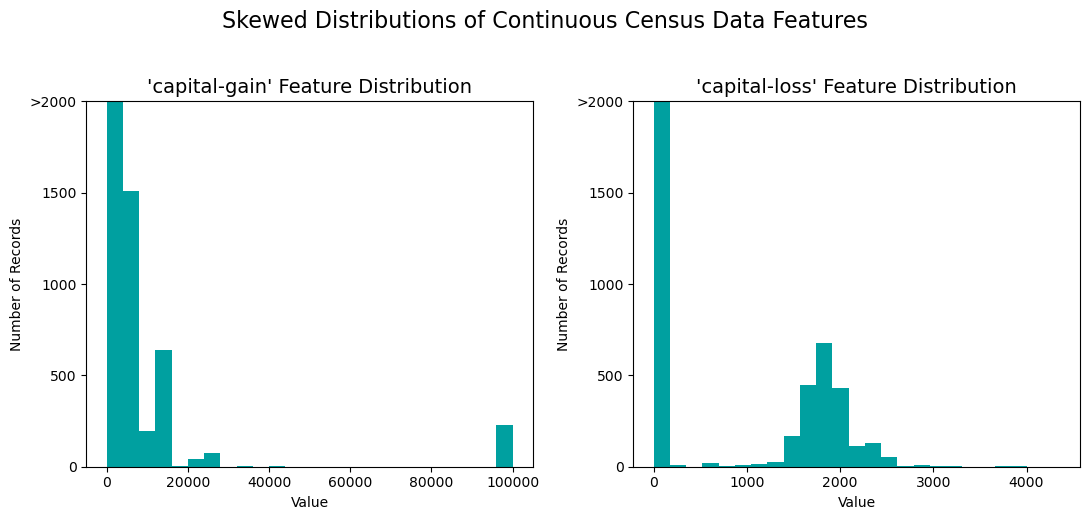

In [40]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
distribution(data)

To identify numerical columns in a DataFrame and then count the number of missing values in each numerical column. Here's how it works:

1. numerical = [var for var in data.columns if data[var].dtype!='O']: This line creates a list called numerical using a list comprehension. It iterates over each column name (var) in the DataFrame data.columns and checks if the column's data type (data[var].dtype) is not equal to 'O' (i.e., not an object/string type). If the condition is true, the column name is added to the numerical list.

2. data[numerical].isnull().sum(): This line selects only the numerical columns from the DataFrame data using data[numerical]. Then, the isnull() function is applied to check for missing values in each column, resulting in a DataFrame with the same shape as data[numerical], where each cell contains a Boolean value indicating whether the corresponding value in the original DataFrame was missing or not. Finally, the sum() function is used to calculate the sum of missing values for each column, resulting in a Series where the column names are the index and the corresponding values represent the count of missing values in each column.

By running this code, you will get a Series that shows the count of missing values for each numerical column in the DataFrame data.

In [41]:
numerical = [var for var in data.columns if data[var].dtype!='O']
data[numerical].isnull().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

To create box plots for each numerical column in the DataFrame data. Box plots are a useful visualization for identifying outliers in the data. Here's how the code works:

1. data.plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False, figsize=(20,10), color='gray'): This line uses the plot function of a DataFrame to create box plots. The kind='box' parameter specifies that box plots should be created. subplots=True creates separate subplots for each column. layout=(1,5) specifies that the subplots should be arranged in a grid with 1 row and 5 columns. sharex=False and sharey=False indicate that the x-axis and y-axis should not be shared across subplots. figsize=(20,10) sets the size of the figure to 20 inches wide and 10 inches high. color='gray' sets the color of the box plots to gray.

By running this code, you will get a figure with box plots for each numerical column in the DataFrame data. Each box plot represents the distribution of values for a specific column, allowing you to visually identify any outliers in the data. Outliers are typically shown as individual points outside the whiskers of the box plots.

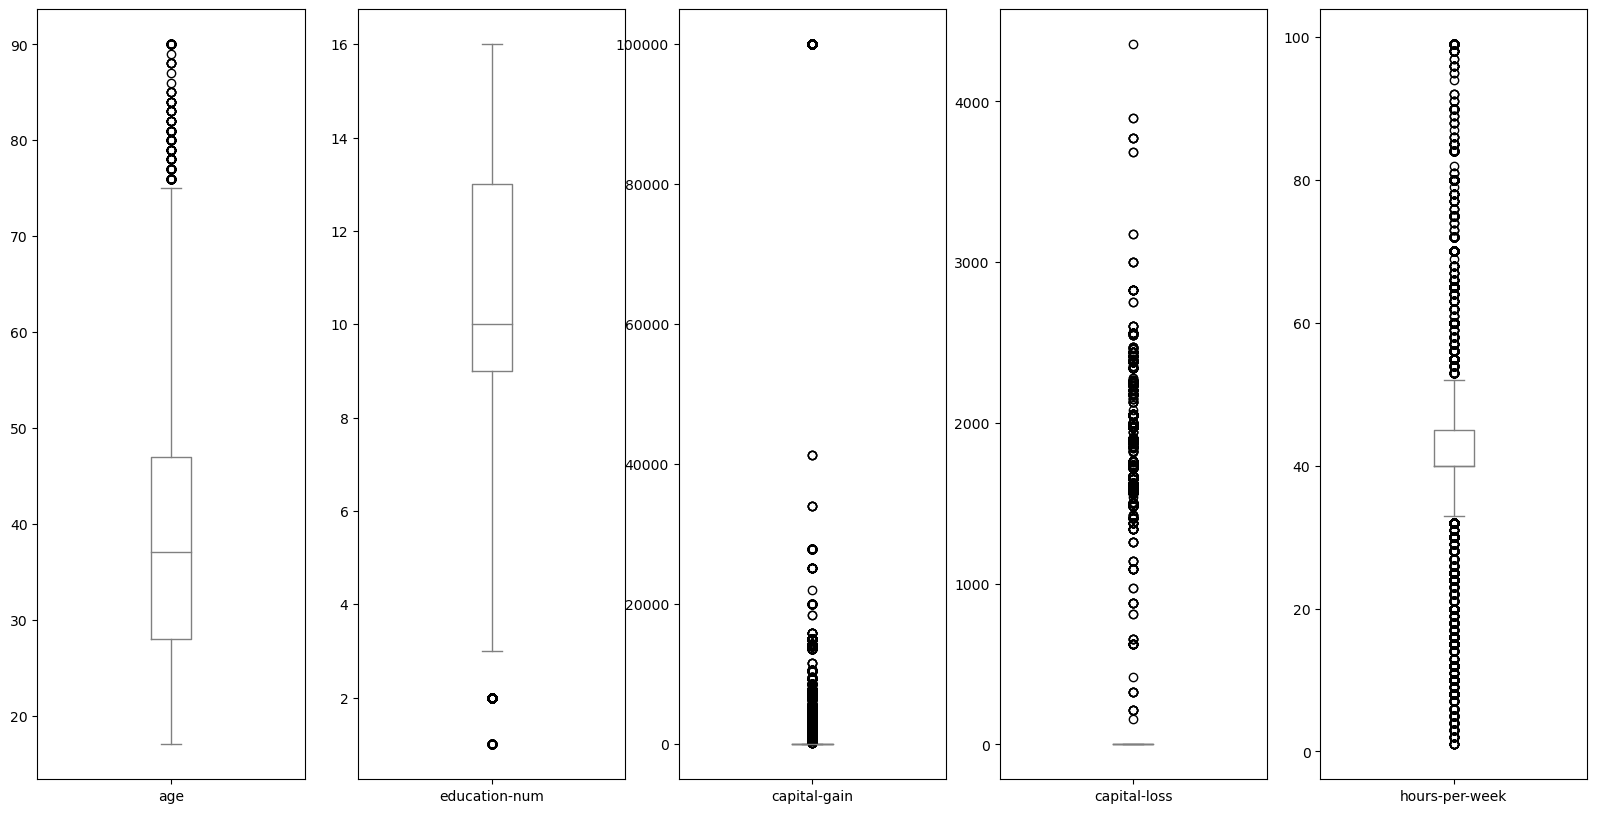

In [42]:
#finding the outliers and removing them 
data.plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False, figsize=(20,10), color='gray');

To identify and filter out outliers in specific columns of the DataFrame data. Here's how the code works:

1. qA = data["age"].quantile(0.99): This line calculates the 99th percentile of the "age" column using the quantile function. The variable qA stores the value of the 99th percentile.

1. data[data["age"] < qA]: This line filters the DataFrame data to keep only the rows where the "age" column is less than qA. This effectively removes the outliers in the "age" column.

1. qE = data["education-num"].quantile(0.99): This line calculates the 99th percentile of the "education-num" column and stores it in the variable qE.

1. data[data["education-num"] < qE]: This line filters the DataFrame data to keep only the rows where the "education-num" column is less than qE, removing the outliers in the "education-num" column.

1. qC = data["capital-gain"].quantile(0.99): This line calculates the 99th percentile of the "capital-gain" column and stores it in the variable qC.

1. data[data["capital-gain"] < qC]: This line filters the DataFrame data to keep only the rows where the "capital-gain" column is less than qC, removing the outliers in the "capital-gain" column.

1. qL = data["capital-loss"].quantile(0.99): This line calculates the 99th percentile of the "capital-loss" column and stores it in the variable qL.

1. data[data["capital-loss"] < qL]: This line filters the DataFrame data to keep only the rows where the "capital-loss" column is less than qL, removing the outliers in the "capital-loss" column.

1. qH = data["hours-per-week"].quantile(0.99): This line calculates the 99th percentile of the "hours-per-week" column and stores it in the variable qH.

1. data[data["hours-per-week"] < qH]: This line filters the DataFrame data to keep only the rows where the "hours-per-week" column is less than qH, removing the outliers in the "hours-per-week" column.

By running this code, you will obtain filtered versions of the DataFrame data where the outliers in the specified columns have been removed.

In [43]:
qA = data["age"].quantile(0.99)
data[data["age"] < qA]
qE = data["education-num"].quantile(0.99)
data[data["education-num"] < qE]
qC = data["capital-gain"].quantile(0.99)
data[data["capital-gain"] < qC]
qL = data["capital-loss"].quantile(0.99)
data[data["capital-loss"] < qL]
qH = data["hours-per-week"].quantile(0.99)
data[data["hours-per-week"] < qH]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


----
## logarithmic transformation
1. skewed = ['capital-gain', 'capital-loss']: Creates a list called skewed containing the names of the skewed features in the dataset.

2. features_log_transformed = pd.DataFrame(data=features_raw): Creates a new DataFrame features_log_transformed that is a copy of the original features DataFrame (features_raw).

3. features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1)): Applies a logarithmic transformation to the skewed features using the apply function. For each feature in the skewed list, the lambda function lambda x: np.log(x + 1) is applied, which computes the natural logarithm of each value in the feature plus 1. The transformed values are then assigned back to the corresponding columns in the features_log_transformed DataFrame.

4. distribution(features_log_transformed, transformed=True): Calls the distribution function to visualize the transformed log distributions of the features in the features_log_transformed DataFrame. The transformed=True parameter is passed to indicate that the distributions being plotted are the log-transformed distributions.

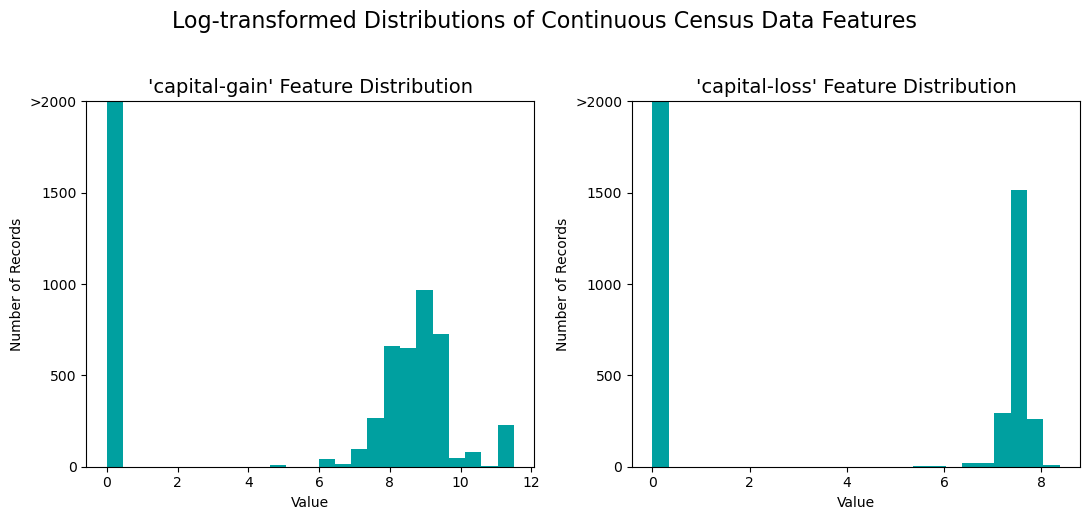

In [44]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, transformed = True)

----
## Normalizing Numerical Features

1. from sklearn.preprocessing import MinMaxScaler: Imports the MinMaxScaler class from the sklearn.preprocessing module. The MinMaxScaler is a common scaler used to scale numerical features to a specific range, typically between 0 and 1.

2. scaler = MinMaxScaler(): Initializes an instance of the MinMaxScaler. By default, it scales features to the range (0, 1).

3. numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']: Creates a list called numerical containing the names of the numerical features in the dataset that require scaling.

4. features_log_minmax_transform = pd.DataFrame(data=features_log_transformed): Creates a new DataFrame features_log_minmax_transform that is a copy of the log-transformed features DataFrame (features_log_transformed).

5. features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical]): Applies the scaler to the numerical features in the features_log_transformed DataFrame. The fit_transform method of the scaler scales the specified columns of the DataFrame and replaces the values with the scaled values.

6. display(features_log_minmax_transform.head(n=5)): Displays the first 5 records of the features_log_minmax_transform DataFrame, showing an example of the records with scaling applied.

In [45]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


----
## one-hot encoding

1. features_final = pd.get_dummies(features_log_minmax_transform): Performs one-hot encoding on the features_log_minmax_transform DataFrame using the pandas.get_dummies() function. This function converts categorical variables into dummy/indicator variables, creating new binary columns for each unique category in the dataset.

2. income = income_raw.replace({'<=50K':0, '>50K':1}): Encodes the income_raw data (target label) to numerical values by replacing the categorical values '<=50K' with 0 and '<=50K' with 1. This step is necessary to convert the target label into a binary representation for classification tasks.

3. encoded = list(features_final.columns): Creates a list called encoded that contains the names of all the features after one-hot encoding.

4. print("{} total features after one-hot encoding.".format(len(encoded))): Prints the total number of features in the features_final DataFrame after one-hot encoding.

5. print(encoded): Prints the names of the encoded features.

In [46]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)


# Encode the 'income_raw' data to numerical values
income = income_raw.replace({'<=50K':0, '>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


----
## Shuffle and Split Data

1. from sklearn.model_selection import train_test_split: Imports the train_test_split function from the sklearn.model_selection module. This function is used to split the data into training and testing sets.

2. X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size=0.2, random_state=0): Splits the features_final and income data into training and testing sets. The features_final contains the features after one-hot encoding, and income contains the encoded target label. The test_size parameter specifies the proportion of the data to be used for testing (in this case, 20% of the data). The random_state parameter is set to 0 to ensure reproducibility of the split.

3. print("Training set has {} samples.".format(X_train.shape[0])): Prints the number of samples in the training set.

4. print("Testing set has {} samples.".format(X_test.shape[0])): Prints the number of samples in the testing set.

In [47]:
# Import train_test_split
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
----
1. calculates the true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) based on the naive case, where all predictions are positive. It then calculates accuracy, precision, recall, and F-score using the following formulas:

* TP: Sum of all positive instances in the 'income' data.

* FP: Count of all instances in the 'income' data minus TP.

* TN: 0 (since there are no predicted negatives in the naive case).

* FN: 0 (since there are no predicted negatives in the naive case).

* Accuracy: (TP + TN) / (TP + TN + FP + FN)

* Recall: TP / (TP + FN)

* Precision: TP / (TP + FP)

2. The F-score is calculated using the formula:

* F-score: (1 + beta^2) * ((precision * recall) / ((beta^2 * precision) + recall))
3. In this case, the code uses a beta value of 0.5 for the F-score calculation.

In [48]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP/(TP + FN)
precision = TP/(TP + FP)


# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+(0.5)**2)*((precision*recall)/(((0.5)**2)*precision+recall))

----
----
## Creating a Training and Predicting Pipeline

1. from sklearn.metrics import fbeta_score, accuracy_score: Imports the fbeta_score and accuracy_score metrics from the sklearn.metrics module. These metrics are used to evaluate the performance of the learning algorithm.

2. def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):: Defines the function train_predict that takes several inputs:

* learner: The learning algorithm to be trained and predicted on.
* sample_size: The size of the samples to be drawn from the training set.
* X_train: The features of the training set.
* y_train: The target labels of the training set.
* X_test: The features of the testing set.
* y_test: The target labels of the testing set.

3. The function initializes a dictionary results to store the results of the training and prediction.

4. start = time() and end = time(): These lines of code record the start and end times of the training and prediction processes.

5. learner = learner.fit(X_train[:sample_size], y_train[:sample_size]): Trains the learner algorithm on a subset of the training data specified by sample_size. The algorithm is fitted to the features X_train[:sample_size] and the corresponding target labels y_train[:sample_size].

6. results['train_time'] = end - start: Calculates the training time by taking the difference between the end and start times.

7. start = time() and end = time(): These lines of code record the start and end times of the prediction process.

8. predictions_test = learner.predict(X_test): Makes predictions on the testing set X_test using the trained learner algorithm and stores the predictions in predictions_test.

9. predictions_train = learner.predict(X_train[:300]): Makes predictions on the first 300 training samples X_train[:300] using the trained learner algorithm and stores the predictions in predictions_train.

10. results['pred_time'] = end - start: Calculates the prediction time by taking the difference between the end and start times.

11. results['acc_train'] = accuracy_score(y_train[:300], predictions_train): Computes the accuracy of the predictions on the first 300 training samples y_train[:300] and stores it in results['acc_train'].

12. results['acc_test'] = accuracy_score(y_test, predictions_test): Computes the accuracy of the predictions on the testing set y_test and stores it in results['acc_test'].

13. results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5): Computes the F-score of the predictions on the first 300 training samples y_train[:300] using the beta value of 0.5 and stores it in results['f_train'].

14. results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5): Computes the F-score of the predictions on the testing set y_test using the beta value of 0.5 and stores it in results['f_test'].

15. print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size)): Prints a message indicating which algorithm was trained and on how many samples.

16. `return results

In [49]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    #  Get the predictions on the test set(X_test),then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,  beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

----
## Comparison of Naive Bayes Classifiers on Census Income Prediction

1. Imports the necessary libraries and modules, including the three supervised learning models from scikit-learn (GaussianNB, BernoulliNB, MultinomialNB) and matplotlib.pyplot.

2. Initializes three instances of the Naive Bayes models:

* clf_A is an instance of GaussianNB, which assumes that the features follow a Gaussian distribution.
* clf_B is an instance of BernoulliNB, which is suitable for binary features.
* clf_C is an instance of MultinomialNB, which is appropriate for features that represent discrete counts (e.g., word counts).

3. Calculates the number of samples for 1%, 10%, and 100% of the training data.

4. Initializes an empty dictionary called results to store the evaluation results.

5. Iterates over each Naive Bayes classifier and number of samples:

* For each classifier, the loop sets the classifier's name as clf_name.
*  For each number of samples, the loop calls the train_predict function to train and predict using the specified classifier and number of samples. The results are stored in the results dictionary.
6. After the loop, the results dictionary contains the evaluation results for each classifier and number of samples.

7. Calls an evaluate function (not provided in the code snippet) to visualize the metrics (accuracy and F-score) for the three supervised learning models.

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
BernoulliNB trained on 361 samples.
BernoulliNB trained on 3617 samples.
BernoulliNB trained on 36177 samples.
MultinomialNB trained on 361 samples.
MultinomialNB trained on 3617 samples.
MultinomialNB trained on 36177 samples.


/tmp/ipykernel_32/1093474461.py:122: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


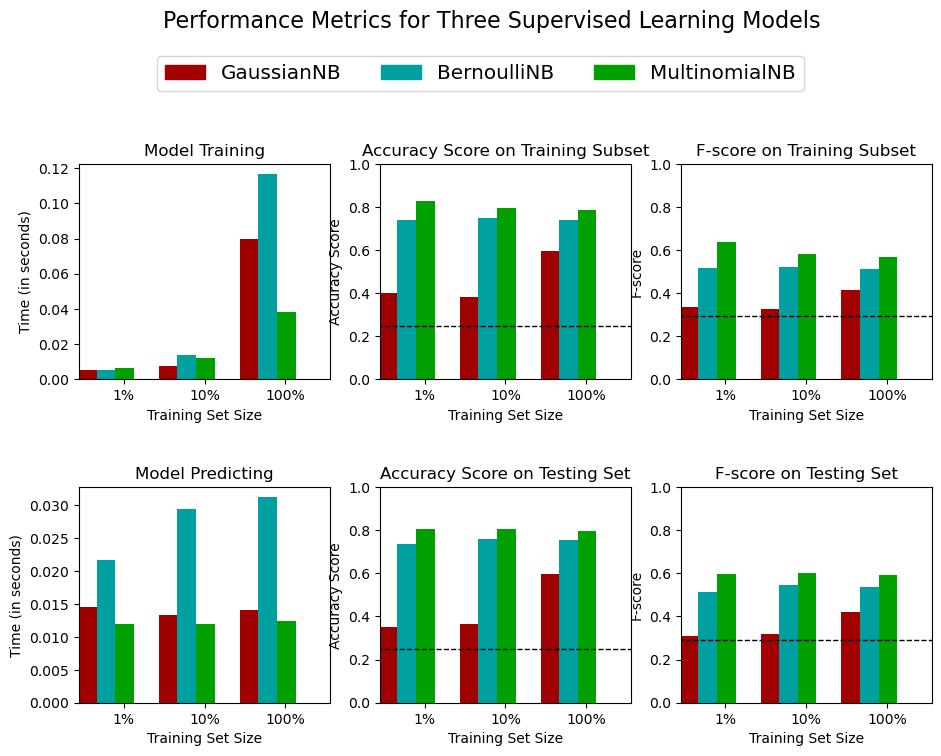

In [50]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


# Initialize the three models
clf_A = GaussianNB()
clf_B = BernoulliNB()
clf_C = MultinomialNB()


# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 =int(samples_100*0.1)
samples_1 = int(samples_100*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

----
----
## Multinomial Naive Bayes Classifier 
## "Grid Search Optimization of Multinomial Naive Bayes Classifier for Census Income Prediction"

1. Imports the necessary libraries and modules, including make_scorer and GridSearchCV from scikit-learn, StandardScaler from sklearn.preprocessing, and other relevant libraries.

2. Performs feature scaling using StandardScaler on the training and testing data (X_train and X_test).

3. Converts continuous features to discrete values by rounding the scaled values to the nearest integers.

4. Ensures non-negative values by adding the absolute minimum value of the training data to the discrete values.

5. Ensures integer values by converting the non-negative values to integers.

6. Initializes an instance of the MultinomialNB classifier.

7. Defines the parameters to be tuned in a dictionary format. In this case, the parameters are 'alpha' and 'fit_prior'.

8. Creates a scoring object using make_scorer() and specifying fbeta_score as the scoring metric with a beta value of 0.5.

9. Performs a grid search on the classifier using GridSearchCV(). It takes the classifier, parameters, scoring method, and cross-validation value (cv) as inputs.

10. Fits the grid search object to the training data and finds the optimal parameters using fit().

11. Retrieves the best estimator from the grid search results.

12. Makes predictions using the best estimator on the testing data.

13. Prints the final accuracy score and F-score on the testing data.

In [51]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert continuous features to discrete values
X_train_discrete = np.round(X_train_scaled)  # Example: rounding the values to the nearest integers
X_test_discrete = np.round(X_test_scaled)

# Ensure non-negative values
X_train_non_negative = X_train_discrete + abs(np.min(X_train_discrete))
X_test_non_negative = X_test_discrete + abs(np.min(X_train_discrete))

# Ensure integer values
X_train_final = X_train_non_negative.astype(int)
X_test_final = X_test_non_negative.astype(int)

# Initialize the classifier
clf = MultinomialNB()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters ={
    'alpha': [0.1, 0.5, 1.0, 2.0], 
    'fit_prior': [True, False]
}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_final, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the model
best_predictions = best_clf.predict(X_test_final)

print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))

Final accuracy score on the testing data: 0.8187
Final F-score on the testing data: 0.6300
